# AAA Analysis
## Looking at guys who might come up at some point
### MSP 06.19.2017

A lesson in 'Well, who are you replacing?'

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv
%matplotlib inline

In [9]:

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position


def read_batting_data(infile):
    BatData = np.genfromtxt(("\t".join(i) for i in csv.reader(open(infile))), delimiter="\t",\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1)
    return BatData

def read_minor_batting_data(infile):
    BatData = np.genfromtxt(("\t".join(i) for i in csv.reader(open(infile))), delimiter="\t",\
                  dtype={'names': ("Name","Team","Age","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1)
    return BatData





MLB2017   = read_batting_data('2017data/AllPA061917.csv')
INT2017   = read_minor_batting_data('2017data/International061917.csv')
PCL2017   = read_minor_batting_data('2017data/PCL061917.csv')
MEX2017   = read_minor_batting_data('2017data/Mexican061917.csv')





Who's the youngest guy in each AAA league?

In [16]:
print 'International:',INT2017['Name'][np.where(INT2017['Age']==np.min(INT2017['Age']))[0]],np.min(INT2017['Age'])
print 'PCL:',PCL2017['Name'][np.where(PCL2017['Age']==np.min(PCL2017['Age']))[0]],np.min(PCL2017['Age'])
print 'Mexican:',MEX2017['Name'][np.where(MEX2017['Age']==np.min(MEX2017['Age']))[0]],np.min(MEX2017['Age'])

International: ['Gleyber Torres' 'Ozzie Albies'] 20
PCL: ['Brayan Hernandez'] 19
Mexican: ['Fernando Inzunza' 'Gibran Guerra'] 18


MLB 250-260
['Sandy Leon' 'Yoenis Cespedes' 'Gregory Polanco' 'Dee Gordon' 'Ian Happ'
 'Jake Marisnick' 'Josh Donaldson' 'Alexi Amarista' 'Joc Pederson'
 'Jose Osuna']
PCL Top 10
[('Oswaldo Arcia', 'Diamondbacks (AAA)'), ('Christian Walker', 'Diamondbacks (AAA)'), ('Garrett Cooper', 'Brewers (AAA)'), ('Noel Cuevas', 'Rockies (AAA)'), ('Preston Tucker', 'Astros (AAA)'), ('Amed Rosario', 'Mets (AAA)'), ('Victor Caratini', 'Cubs (AAA)'), ('Colin Moran', 'Astros (AAA)'), ("O'Koyea Dickson", 'Dodgers (AAA)'), ('Luke Voit', 'Cardinals (AAA)')]
INT Top 10
[('Rhys Hoskins', 'Phillies (AAA)'), ('Richie Shaffer', 'Indians (AAA)'), ('Dylan Cozens', 'Phillies (AAA)'), ('Brandon Snyder', 'Nationals (AAA)'), ('Danny Hayes', 'White Sox (AAA)'), ('Jason Leblebijian', 'Blue Jays (AAA)'), ('Clint Robinson', 'Nationals (AAA)'), ('Nick Williams', 'Phillies (AAA)'), ('Pedro Alvarez', 'Orioles (AAA)'), ('Clint Frazier', 'Yankees (AAA)')]
MEX Top 10
['Ricky Alvarez' 'Corey Brown' 'Rainel Rosario' 'Manny Rodr

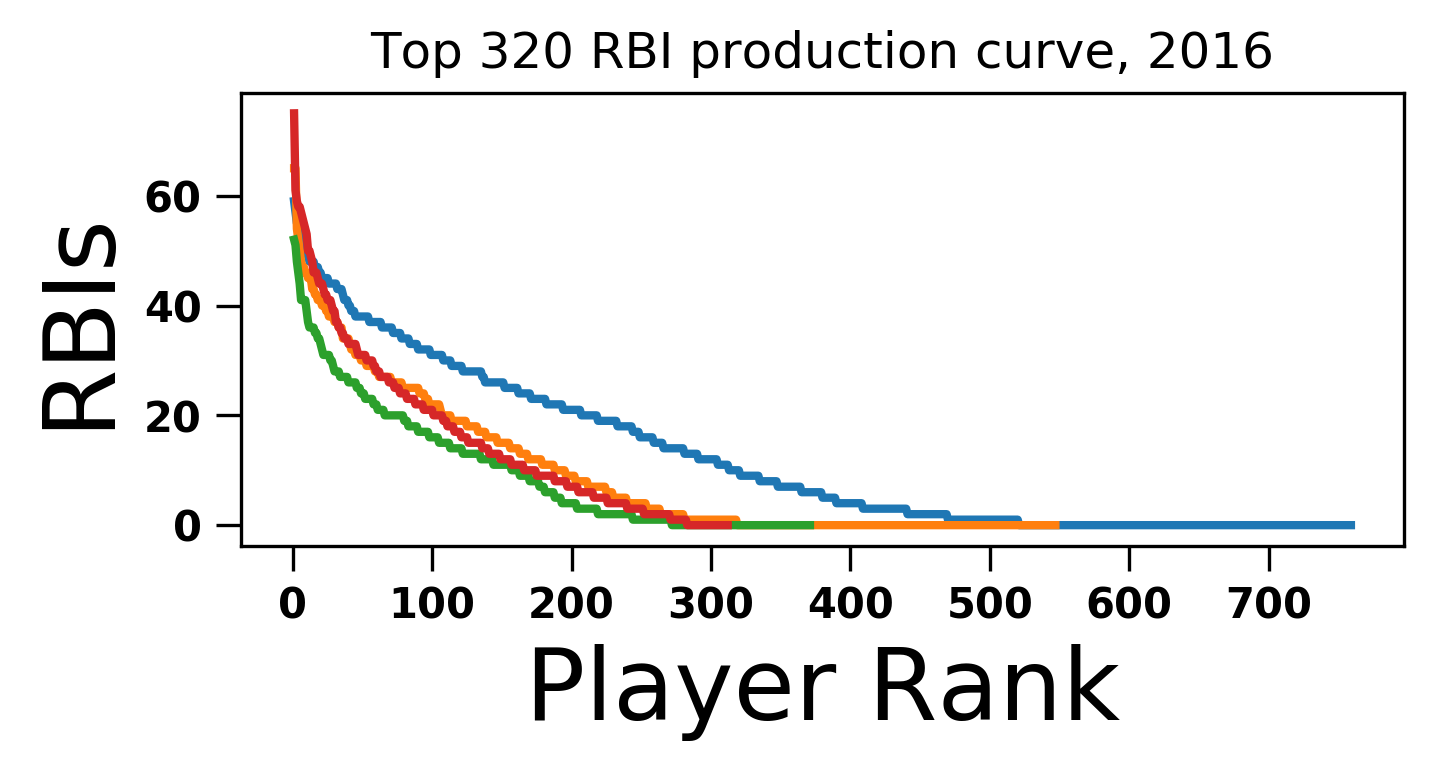

In [62]:
rbis = MLB2017['RBI']#/MLB2017['PA']
#pas = 
names = MLB2017['Name']

print 'MLB 250-260'
print names[(-1.*rbis).argsort()][250:260]



plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()])

rbis = PCL2017['RBI']#/PCL2017['PA']
#pas = 
names = PCL2017['Name']
team = PCL2017['Team']



print 'PCL Top 10'
print [(names[(-1.*rbis).argsort()][x],team[(-1.*rbis).argsort()][x]) for x in np.arange(0,10,1)]




plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()])

rbis = INT2017['RBI']#/PCL2017['PA']
#pas = 

names = INT2017['Name']
team = INT2017['Team']


plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()])

print 'INT Top 10'
print [(names[(-1.*rbis).argsort()][x],team[(-1.*rbis).argsort()][x]) for x in np.arange(0,10,1)]



rbis = MEX2017['RBI']#/PCL2017['PA']
#pas = 
names = MEX2017['Name']


plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()])



print 'MEX Top 10'
print names[(-1.*rbis).argsort()][0:10]






plt.xlabel('Player Rank',size=24)
plt.ylabel('RBIs',size=24)
plt.title('Top 320 RBI production curve, 2016')
#_ = plt.axis([1.,320.,np.min(rbis),np.max(rbis)])

['Scott Schebler' 'Troy Tulowitzki' 'Robbie Ray' 'DJ LeMahieu'
 'Erik Gonzalez' 'Mikie Mahtook' 'Abraham Almonte' 'Robinson Cano'
 'Aaron Altherr' 'Addison Russell']


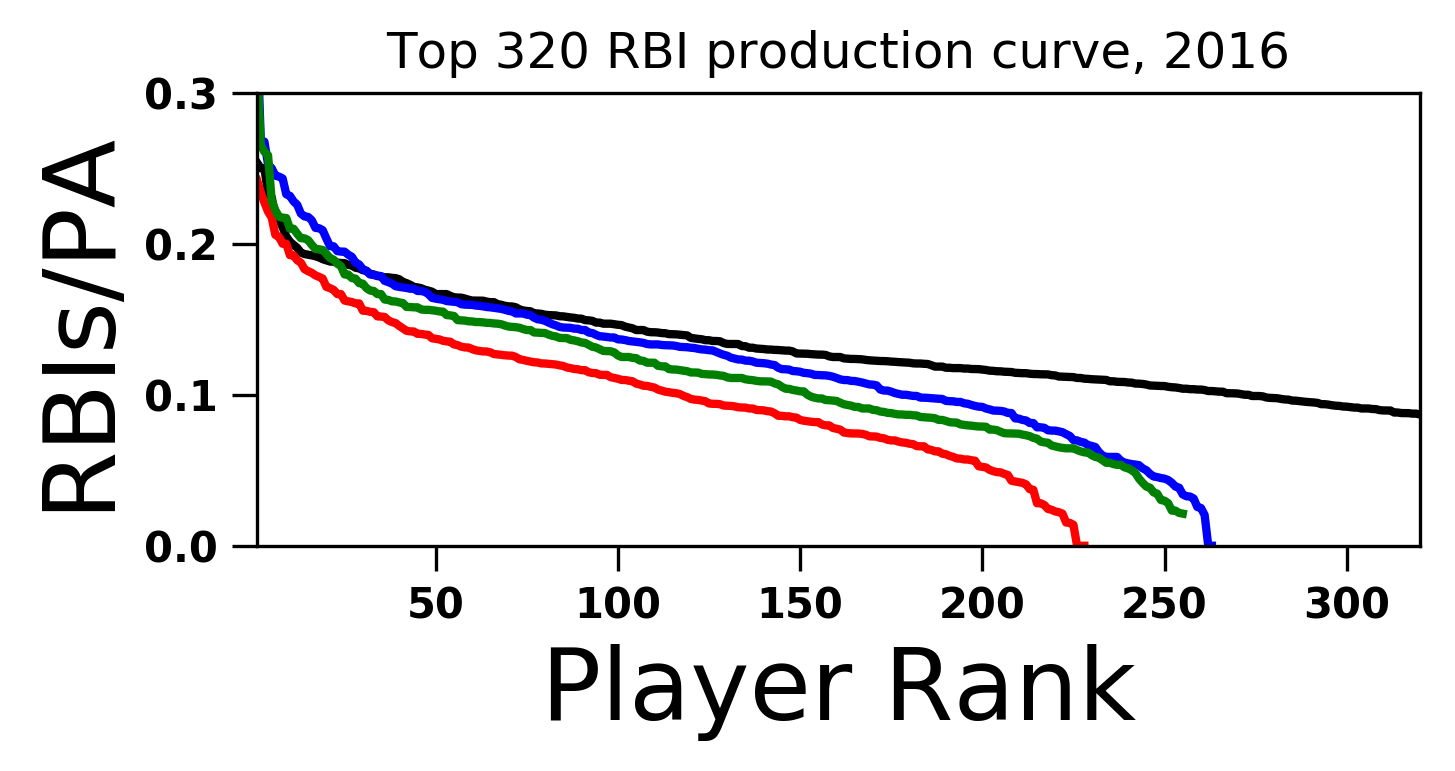

In [70]:
rbis = MLB2017['RBI'][np.where(MLB2017['PA'] > pa_lim)]/\
       MLB2017['PA'][np.where(MLB2017['PA'] > pa_lim)]#pas = 
names = MLB2017['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='black')

print names[(-1.*rbis).argsort()][250:260]


rbis = PCL2017['RBI'][np.where(PCL2017['PA'] > pa_lim)]/\
       PCL2017['PA'][np.where(PCL2017['PA'] > pa_lim)]#pas = #pas = 
names = MLB2017['Name']

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='blue')

rbis = INT2017['RBI'][np.where(INT2017['PA'] > pa_lim)]/\
       INT2017['PA'][np.where(INT2017['PA'] > pa_lim)]#pas = 

#pas = 

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='red')


rbis = MEX2017['RBI'][np.where(MEX2017['PA'] > pa_lim)]/\
       MEX2017['PA'][np.where(MEX2017['PA'] > pa_lim)]#pas = 


#pas = 

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='green')





plt.xlabel('Player Rank',size=24)
plt.ylabel('RBIs/PA',size=24)
plt.title('Top 320 RBI production curve, 2016')
_ = plt.axis([1.,320.,0.,0.3])

['Arismendy Alcantara' 'Jose Torres' 'Daniel Descalso' 'Rob Segedin'
 'Salvador Perez' 'Derek Fisher' 'Robbie Ray' 'Caleb Joseph'
 'Maikel Franco' 'Drew Butera']


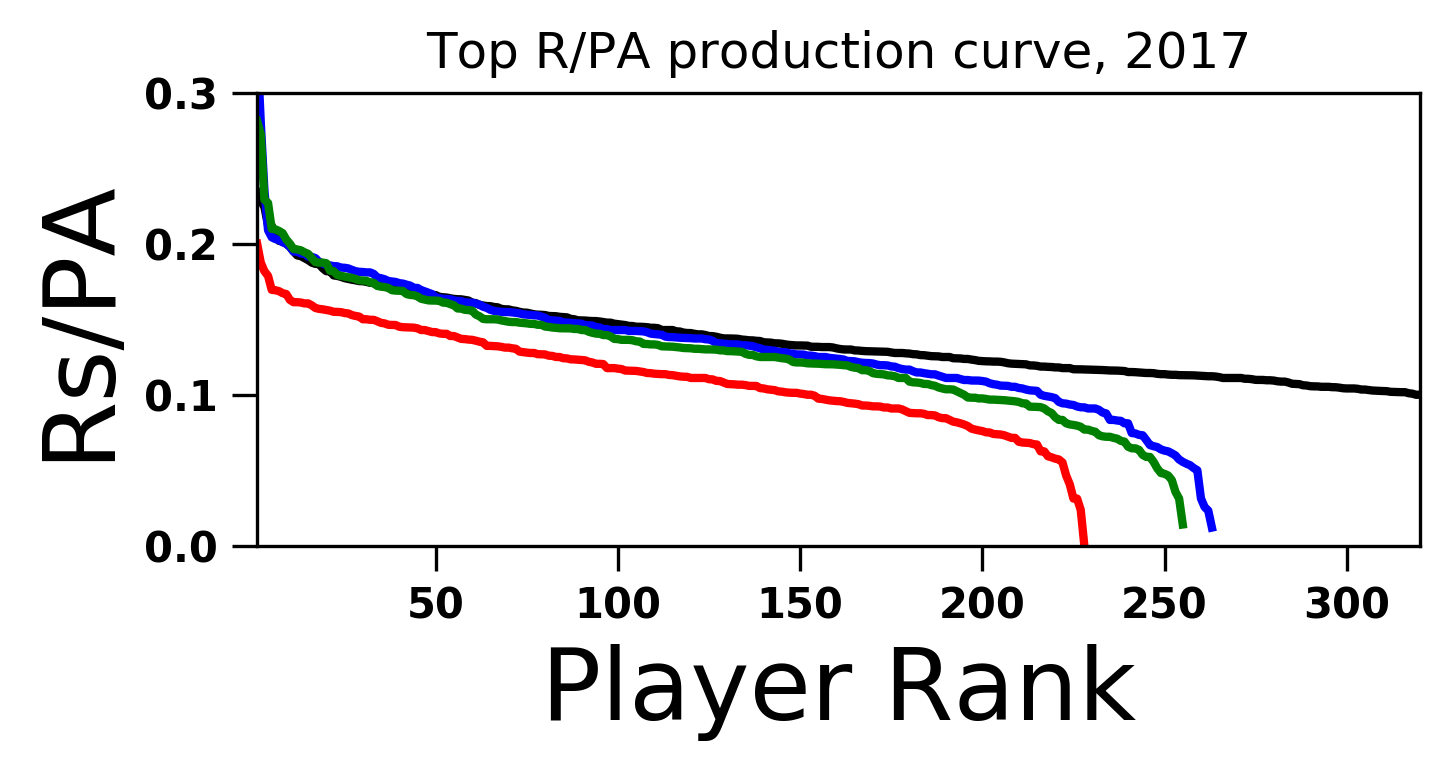

In [69]:


pa_lim = 30.

rbis = MLB2017['R'][np.where(MLB2017['PA'] > pa_lim)]/\
       MLB2017['PA'][np.where(MLB2017['PA'] > pa_lim)]
#pas = 
names = MLB2017['Name']


plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='black')

print names[(-1.*rbis).argsort()][250:260]


rbis = PCL2017['R'][np.where(PCL2017['PA'] > pa_lim)]/\
       PCL2017['PA'][np.where(PCL2017['PA'] > pa_lim)]#pas = 
names = PCL2017['Name']

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='blue')

rbis = INT2017['R'][np.where(INT2017['PA'] > pa_lim)]/\
       INT2017['PA'][np.where(INT2017['PA'] > pa_lim)]#pas = 

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='red')



rbis = MEX2017['R'][np.where(MEX2017['PA'] > pa_lim)]/\
       MEX2017['PA'][np.where(MEX2017['PA'] > pa_lim)]#pas = 

plt.plot(np.linspace(1.,rbis.size,rbis.size),rbis[(-1.*rbis).argsort()],color='green')





plt.xlabel('Player Rank',size=24)
plt.ylabel('Rs/PA',size=24)
plt.title('Top R/PA production curve, 2017')
_ = plt.axis([1.,320.,0.,0.3])

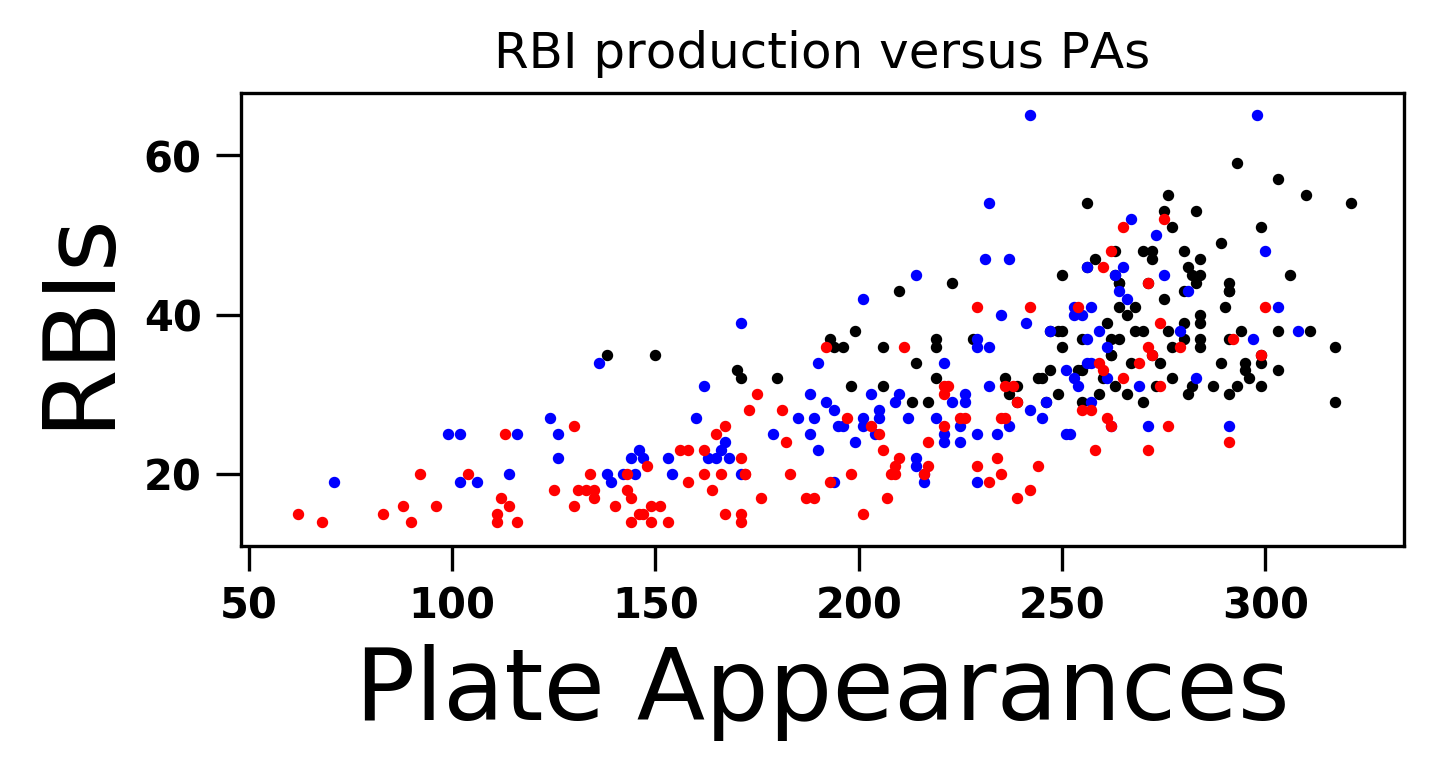

In [57]:

plt.figure(figsize=(5,2))

topx = 120

plt.scatter(MLB2017['PA'][(-1.*MLB2017['RBI']).argsort()][0:topx],\
            MLB2017['RBI'][(-1.*MLB2017['RBI']).argsort()][0:topx],color='black',s=3.)

plt.scatter(PCL2017['PA'][(-1.*PCL2017['RBI']).argsort()][0:topx],\
            PCL2017['RBI'][(-1.*PCL2017['RBI']).argsort()][0:topx],color='blue',s=3.)

plt.scatter(INT2017['PA'][(-1.*INT2017['RBI']).argsort()][0:topx],\
            INT2017['RBI'][(-1.*INT2017['RBI']).argsort()][0:topx],color='red',s=3.)





plt.xlabel('Plate Appearances',size=24)
plt.ylabel('RBIs',size=24)
plt.title('RBI production versus PAs')
#_ = plt.axis([1.,320.,np.min(rbis),np.max(rbis)])

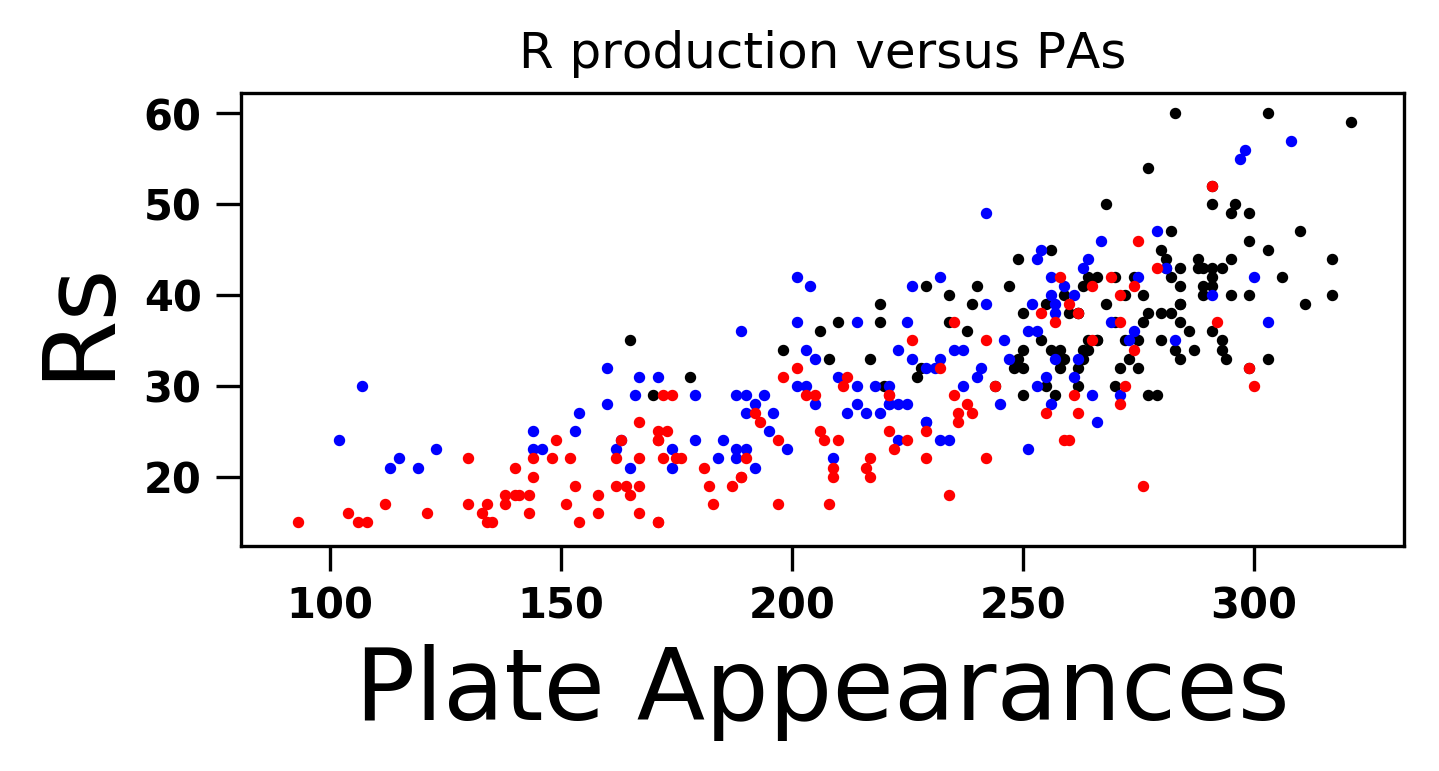

In [58]:

plt.figure(figsize=(5,2))

topx = 120

plt.scatter(MLB2017['PA'][(-1.*MLB2017['R']).argsort()][0:topx],\
            MLB2017['R'][(-1.*MLB2017['R']).argsort()][0:topx],color='black',s=3.)

plt.scatter(PCL2017['PA'][(-1.*PCL2017['R']).argsort()][0:topx],\
            PCL2017['R'][(-1.*PCL2017['R']).argsort()][0:topx],color='blue',s=3.)

plt.scatter(INT2017['PA'][(-1.*INT2017['R']).argsort()][0:topx],\
            INT2017['R'][(-1.*INT2017['R']).argsort()][0:topx],color='red',s=3.)





plt.xlabel('Plate Appearances',size=24)
plt.ylabel('Rs',size=24)
plt.title('R production versus PAs')
#_ = plt.axis([1.,320.,np.min(rbis),np.max(rbis)])

#### What to notice? 

First, you REALLY want those guys who are bending the curve upward above 100 RBIs. The fact that the slope changes indicates that they are exponentially more valuable than guys in the shallower slope set. They are a pretty typical list:



79


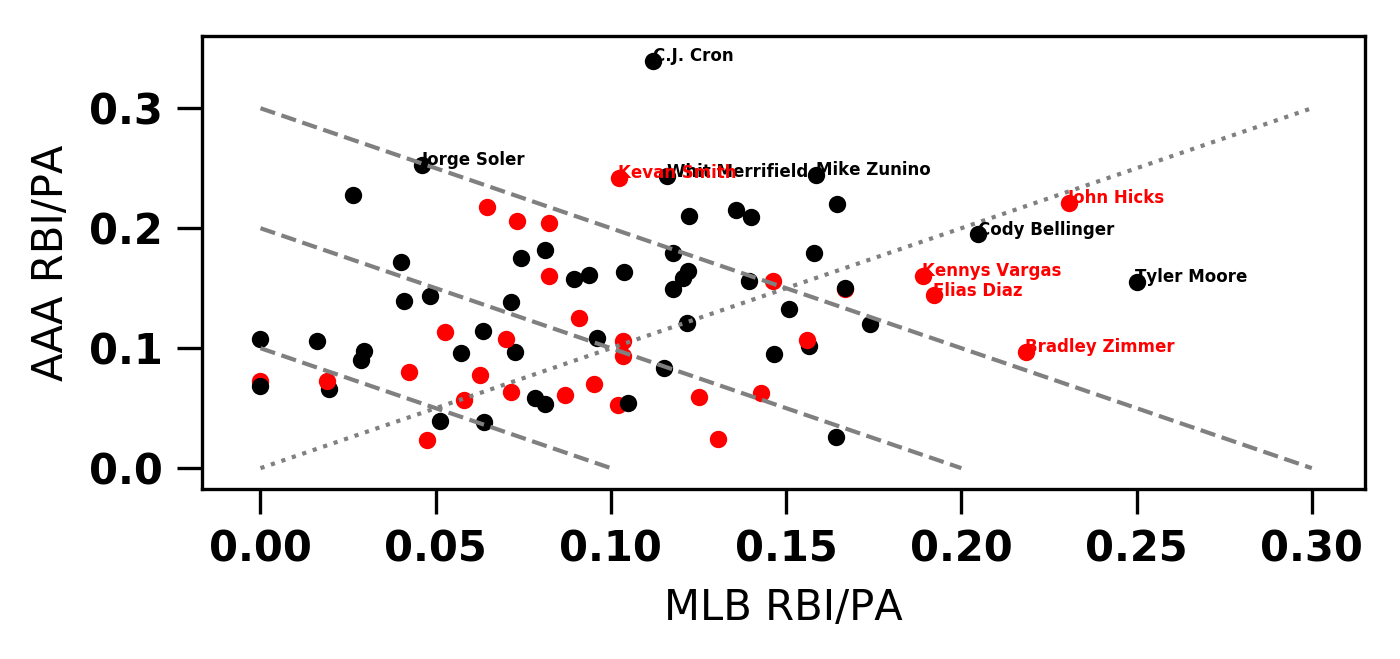

In [81]:
n_players = 0
minpa = 30.
plt.figure(figsize=(5,2))
for indx,val in enumerate(MLB2017['Name']):
    if val in PCL2017['Name']:
        
        val_pos = np.where(val==PCL2017['Name'])[0] 
        
        if (MLB2017['PA'][indx] > minpa) & (PCL2017['PA'][val_pos][0] > minpa):
            n_players += 1
            plt.scatter([MLB2017['RBI'][indx]/MLB2017['PA'][indx]],[PCL2017['RBI'][val_pos][0]/PCL2017['PA'][val_pos][0]],color='black',s=10)

            if ( MLB2017['RBI'][indx]/(MLB2017['PA'][indx]+0.1) > 0.18) |(PCL2017['RBI'][val_pos][0]/(PCL2017['PA'][val_pos][0]+0.01) > 0.23):
                plt.text(MLB2017['RBI'][indx]/(MLB2017['PA'][indx]+0.1),PCL2017['RBI'][val_pos][0]/(PCL2017['PA'][val_pos][0]+0.01),val,size=4,color='black')


    if val in INT2017['Name']:
        
        val_pos = np.where(val==INT2017['Name'])[0] 
        
        if (MLB2017['PA'][indx] > minpa) & (INT2017['PA'][val_pos][0] > minpa):
            n_players += 1
            plt.scatter([MLB2017['RBI'][indx]/MLB2017['PA'][indx]],[INT2017['RBI'][val_pos][0]/INT2017['PA'][val_pos][0]],color='red',s=10)

            if ( MLB2017['RBI'][indx]/(MLB2017['PA'][indx]+0.1) > 0.18) |(INT2017['RBI'][val_pos][0]/(INT2017['PA'][val_pos][0]+0.01) > 0.23):
                plt.text(MLB2017['RBI'][indx]/(MLB2017['PA'][indx]+0.1),INT2017['RBI'][val_pos][0]/(INT2017['PA'][val_pos][0]+0.01),val,size=4,color='red')

        
            
print n_players

plt.plot([0.,0.1],[0.1,0.],color='gray',linestyle='dashed',lw=1.)
plt.plot([0.,0.2],[0.2,0.],color='gray',linestyle='dashed',lw=1.)
plt.plot([0.,0.3],[0.3,0.],color='gray',linestyle='dashed',lw=1.)

plt.plot([0.,0.3],[0.,0.3],color='gray',linestyle='dotted',lw=1.)

plt.xlabel('MLB RBI/PA')
plt.ylabel('AAA RBI/PA')



So 144 guys have had any PAs at both AAA PCL and the MLB